<img src="https://s16353.pcdn.co/wp-content/uploads/2018/06/Churn.png" style="float: left;" width="400" height="100" />
<br><br><br><br>

# &nbsp;&nbsp;&nbsp; PREVENTION CUSTOMER CHURN!


 ## 1. Introduction
    
We need to achieve following,

- Identify and visualize which major factors effects to the customer churn process.
    
- Train an accurate prediction model which can predict if a customer will churn or not.


## 2. Data set review & preparation

In this section we will analyze and explore the structure of our dataset, to perform Exploratory data analysis and model training.


In [1]:
#handeling imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# Read the dataset from the CSV 
df = pd.read_csv('Churn_Modelling.csv', delimiter=',')
df.shape

(10000, 14)

The Dataframe has 1000 rows with 14 columns.

In [3]:
# Checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As per the result there are no missing values. So dataset is good to work with.

In [4]:
# Geting unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

The first three variables are not useful for us so we will not be using it for model training or EDA

In [5]:
# Let's drop the columns as mentioned above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [6]:
# Review dataset
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Check data types for the variables
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We have 6 categorical variables and 5 continuous variables

## 3. Exploratory Data Analysis

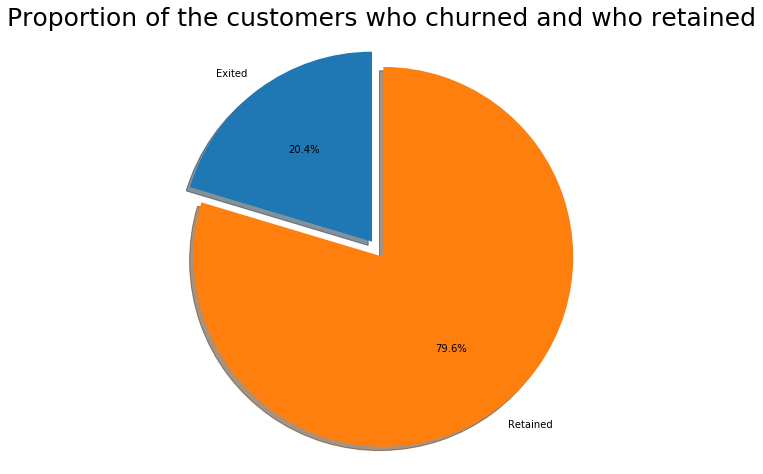

In [8]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of the customers who churned and who retained", size = 25)
plt.show()

So the graphs show that 20.4% of the customers have exited.

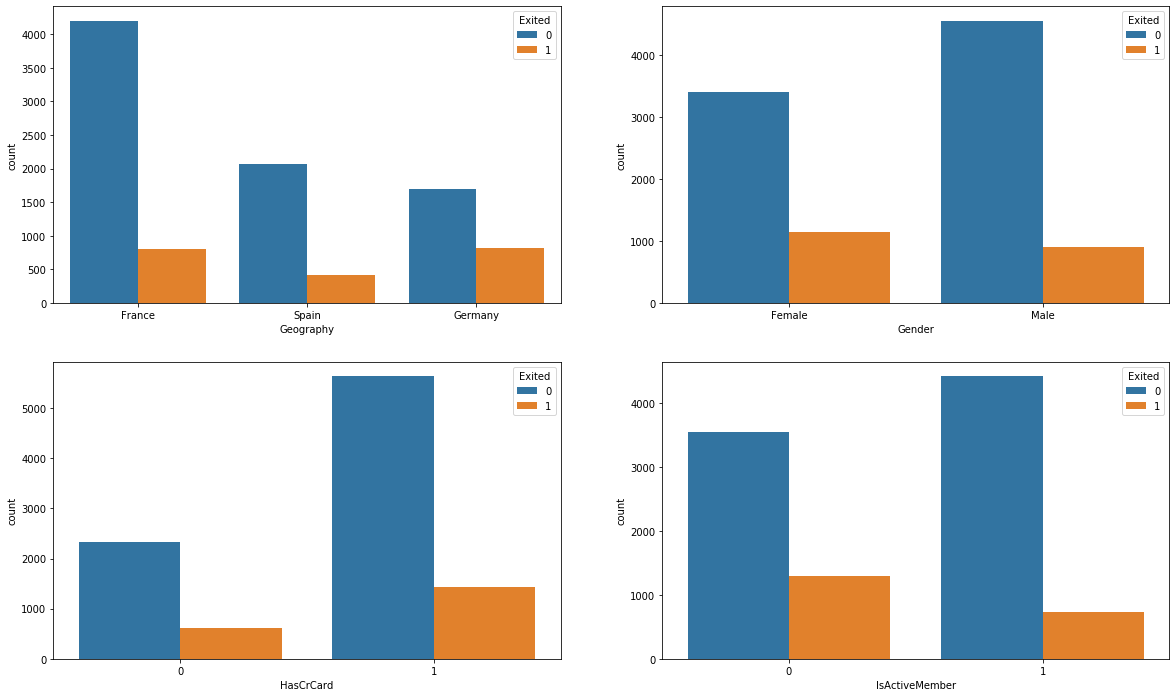

In [9]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

We note the following:
* Majority of the data is from from France region.
* The proportion of female customers churning is also greater than that of male customers
* Customer with the credit card is most likely to churn. 
* Lastly, the inactive customers have a more churning rate as compared to the active customers.


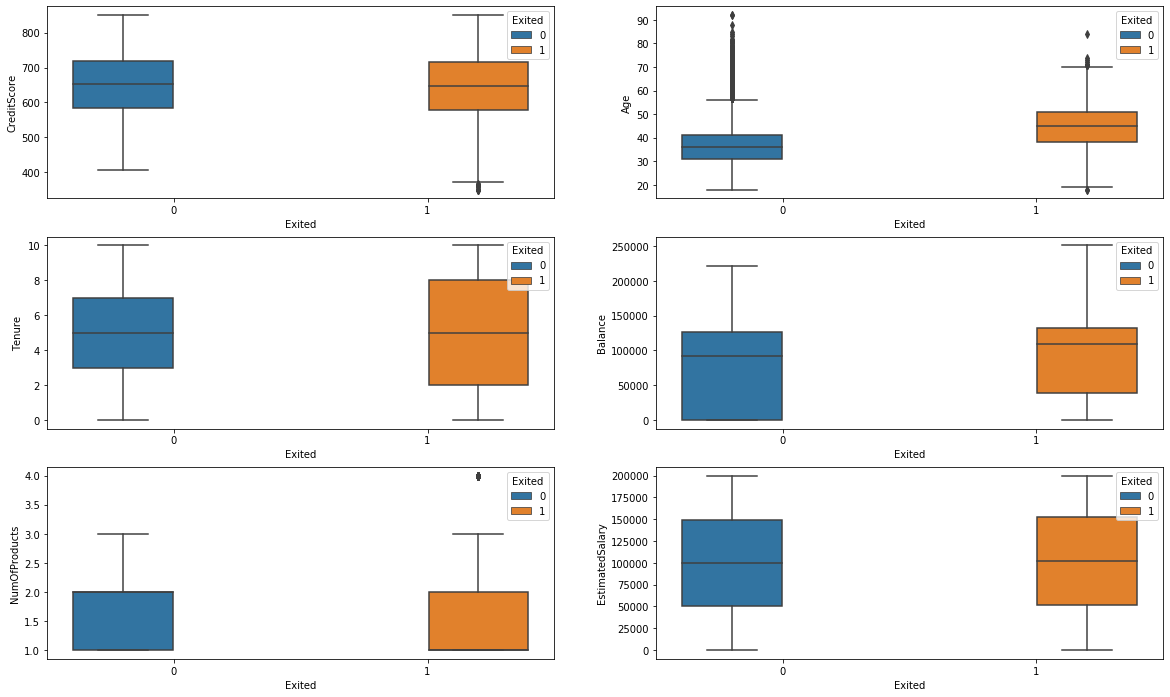

In [10]:
    # Relations based on the continuous data points
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

Important insights:
* There is no big difference in the credit score distributions between exited and retained customers. 
* The older customers are churning more than the younger customers.
* There is no big impact of tenure on churning rate.
* Customers with the high bank balance is churning more than low balance.
* There is no big impact of number of purchased product on churning rate.
* There is no big impact of estimated salary on churning rate.

## 4. Feature engineering
We need to find features which are more important and has high impact on the probability of churning.

In [11]:
# Splitting the data
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1, 5)

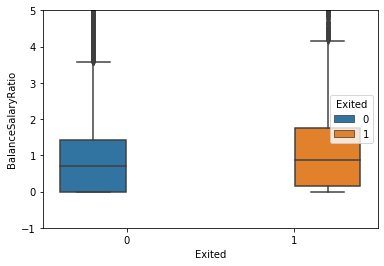

In [12]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

Salary is good variable for us, because it has good impact on churning rate.

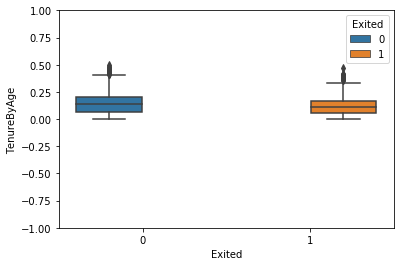

In [13]:
# standardizing tenure over the age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [14]:
#Credit score age wise
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [15]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
2341,717,France,Female,25,7,108664.85,2,1,0,190011.85,0,0.571885,0.280000,28.680000
6414,618,France,Female,21,2,125682.79,1,0,0,57762.00,0,2.175873,0.095238,29.428571
4599,641,France,Female,38,3,0.00,2,1,0,116466.19,0,0.000000,0.078947,16.868421
1884,656,France,Male,35,6,0.00,2,1,0,1485.27,0,0.000000,0.171429,18.742857
8148,780,Spain,Male,47,7,86006.21,1,1,1,37973.13,0,2.264923,0.148936,16.595745


## 5. Data prep for model fitting

In [16]:
# Rearrange the columns by data type to make manipulation easy
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
2341,0,717,25,7,108664.85,2,190011.85,0.571885,0.280000,28.680000,1,0,France,Female
6414,0,618,21,2,125682.79,1,57762.00,2.175873,0.095238,29.428571,0,0,France,Female
4599,0,641,38,3,0.00,2,116466.19,0.000000,0.078947,16.868421,1,0,France,Female
1884,0,656,35,6,0.00,2,1485.27,0.000000,0.171429,18.742857,1,0,France,Male
8148,0,780,47,7,86006.21,1,37973.13,2.264923,0.148936,16.595745,1,1,Spain,Male


In [17]:
#Applying one-hot-encoding with 0 to -1
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
2341,0,717,25,7,108664.85,2,190011.85,0.571885,0.280000,28.680000,1,-1,France,Female
6414,0,618,21,2,125682.79,1,57762.00,2.175873,0.095238,29.428571,-1,-1,France,Female
4599,0,641,38,3,0.00,2,116466.19,0.000000,0.078947,16.868421,1,-1,France,Female
1884,0,656,35,6,0.00,2,1485.27,0.000000,0.171429,18.742857,1,-1,France,Male
8148,0,780,47,7,86006.21,1,37973.13,2.264923,0.148936,16.595745,1,1,Spain,Male


In [18]:
# Applying one-hot-encoding for the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
2341,0,717,25,7,108664.85,2,190011.85,0.571885,0.280000,28.680000,1,-1,1,-1,-1,1,-1
6414,0,618,21,2,125682.79,1,57762.00,2.175873,0.095238,29.428571,-1,-1,1,-1,-1,1,-1
4599,0,641,38,3,0.00,2,116466.19,0.000000,0.078947,16.868421,1,-1,1,-1,-1,1,-1
1884,0,656,35,6,0.00,2,1485.27,0.000000,0.171429,18.742857,1,-1,1,-1,-1,-1,1
8148,0,780,47,7,86006.21,1,37973.13,2.264923,0.148936,16.595745,1,1,-1,1,-1,-1,1


In [19]:
# apply minMax scaling to the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
2341,0,0.734,0.094595,0.7,0.433104,0.333333,0.950092,0.000054,0.560000,0.596755,1,-1,1,-1,-1,1,-1
6414,0,0.536,0.040541,0.2,0.500932,0.000000,0.288780,0.000205,0.190476,0.615507,-1,-1,1,-1,-1,1,-1
4599,0,0.582,0.270270,0.3,0.000000,0.333333,0.582329,0.000000,0.157895,0.300879,1,-1,1,-1,-1,1,-1
1884,0,0.612,0.229730,0.6,0.000000,0.333333,0.007369,0.000000,0.342857,0.347833,1,-1,1,-1,-1,-1,1
8148,0,0.860,0.391892,0.7,0.342793,0.000000,0.189826,0.000213,0.297872,0.294048,1,1,-1,1,-1,-1,1


In [20]:
# data preparation pipeline
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)

    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]

    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1

    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)

    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)

    df_predict = df_predict[df_train_Cols]
    
    return df_predict

## 6. Model Training

In [62]:
# #importing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [50]:
#Defining optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

#initialize ANN
classifier = Sequential()
#make layers
classifier.add(Dense(output_dim = 512, init = 'uniform', activation = 'relu', input_dim = 16))

# Adding the hidden layers
classifier.add(Dense(output_dim = 256, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 128, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
history = classifier.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited, batch_size = 64, epochs = 20, validation_split = 0.2)

/media/dev33/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=16, units=512, kernel_initializer="uniform")`
  import sys
/media/dev33/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/media/dev33/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/media/dev33/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  if sys.path[0] == '':
/media/

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 2s 318us/step - loss: 0.5236 - accuracy: 0.7941 - val_loss: 0.4590 - val_accuracy: 0.8006
Epoch 2/20
6400/6400 [==============================] - 1s 156us/step - loss: 0.4446 - accuracy: 0.7997 - val_loss: 0.4400 - val_accuracy: 0.8006
Epoch 3/20
6400/6400 [==============================] - 1s 152us/step - loss: 0.4242 - accuracy: 0.8192 - val_loss: 0.4132 - val_accuracy: 0.8313
Epoch 4/20
6400/6400 [==============================] - 1s 156us/step - loss: 0.4115 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.8263
Epoch 5/20
6400/6400 [==============================] - 1s 152us/step - loss: 0.4071 - accuracy: 0.8350 - val_loss: 0.4085 - val_accuracy: 0.8306
Epoch 6/20
6400/6400 [==============================] - 1s 151us/step - loss: 0.4098 - accuracy: 0.8355 - val_loss: 0.4070 - val_accuracy: 0.8288
Epoch 7/20
6400/6400 [==============================] - 1s 160us/step - loss

### Model details and hyper-parameters details.

    _________________________________________________________________
    
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense_34 (Dense)             (None, 512)               8704      
    _________________________________________________________________
    dense_35 (Dense)             (None, 256)               131328    
    _________________________________________________________________
    dense_36 (Dense)             (None, 128)               32896     
    _________________________________________________________________
    dense_37 (Dense)             (None, 64)                8256      
    _________________________________________________________________
    dense_38 (Dense)             (None, 16)                1040      
    _________________________________________________________________
    dense_39 (Dense)             (None, 1)                 17        
    =================================================================
    Total params: 182,241
    Trainable params: 182,241
    Non-trainable params: 0
    _________________________________________________________________

- batch size: 64
- epochs: 20
- optimization function: Adam
- learning rate: 0.001
- activation function: relu for hidden layers and sigmoid for output layer
- weight initialization: uniform
- loss function: binary crossentropy

## 7. Model Evaluation and Matrices

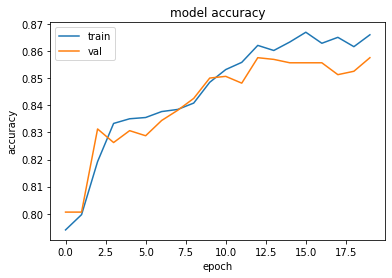

In [54]:
#Getting accuracy graphs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

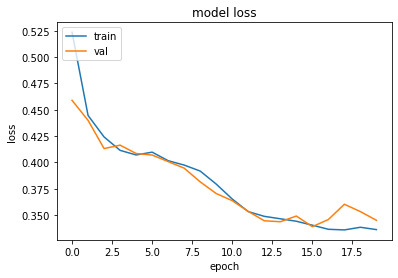

In [55]:
#Getting loss graphs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
#pre-process test data
df_test = DfPrepPipeline(df_test, df_train.columns, minVec, maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.666667,0.402286,1,-1,1,-1,-1,1,-1
7,1,0.052,0.148649,0.4,0.458540,1.000000,0.596733,0.000091,0.727273,0.734574,1,-1,-1,-1,1,1,-1
10,0,0.356,0.175676,0.6,0.406606,0.333333,0.400886,0.000120,0.923077,0.895733,-1,-1,1,-1,-1,-1,1
11,0,0.294,0.081081,0.3,0.000000,0.333333,0.381929,0.000000,1.000000,1.953280,1,-1,-1,1,-1,-1,1
15,0,0.532,0.364865,0.3,0.570468,0.333333,0.321609,0.000210,0.222222,0.449834,-1,1,-1,-1,1,-1,1


In [56]:
# Predicting the Test set results
y_pred = classifier.predict(df_test.loc[:, df_test.columns != 'Exited'])
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [57]:
# Making the Confusion Matrix
cm = confusion_matrix(df_test.Exited, y_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1547    8]
 [ 343   92]]


In [58]:
#getting accuracy score
score = accuracy_score(df_test.Exited, y_pred)
print("Accuracy Score : \n {} %".format(int(score*100)))

Accuracy Score : 
 82 %


In [59]:
#getting classification report
cr = classification_report(df_test.Exited, y_pred)
print("Classification Report : \n {}".format(cr))

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      1555
           1       0.92      0.21      0.34       435

    accuracy                           0.82      1990
   macro avg       0.87      0.60      0.62      1990
weighted avg       0.84      0.82      0.78      1990



In [60]:
roc_auc = roc_auc_score(df_test.Exited, y_pred)
print("ROC and AUC score : \n {}".format(roc_auc))

ROC and AUC score : 
 0.6031747791699006


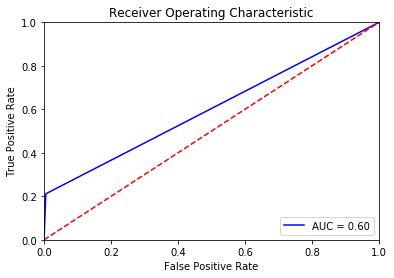

In [61]:
fpr, tpr, threshold = roc_curve(df_test.Exited, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 8. Conclusion

As per results and evaluation I managed to get 86% validation accuracy and 87% training accuracy on churning dataset.

Further this can be improved by making deeper model. Although it can effect model speed.